In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, RidgeCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [3]:
# Load the data
train=pd.read_csv('train.csv',index_col=0)
test=pd.read_csv('test.csv',index_col=0)
train.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
0,I,1.2875,1.0750,0.3625,19.433582,8.306404,4.309124,6.662133,9.0
1,F,1.5500,1.2125,0.4250,33.877653,13.706983,6.676307,10.064072,14.0
2,M,1.3875,1.0625,0.3500,23.388337,9.993199,5.556502,5.811648,11.0
3,F,1.4375,1.1250,0.4375,27.499015,11.254751,5.329706,7.937860,22.0
4,M,1.5250,1.2250,0.4250,32.460178,13.919605,7.569317,8.788345,10.0


In [4]:
# One-hot encoding for 'Sex' column in train and test datasets
train = pd.get_dummies(train, columns=['Sex'], drop_first=False)
test = pd.get_dummies(test, columns=['Sex'], drop_first=False)
# Display the first few rows of the encoded train dataset
train_data=train.iloc[:,[10,9,8,0,1,2,3,4,5,6,7]]
test_data=test.iloc[:,[9,8,7,0,1,2,3,4,5,6]]
train_data.drop(columns=['id'], inplace=True, errors='ignore')
test_data.drop(columns=['id'], inplace=True, errors='ignore')
print(train_data.head())

    Sex_M  Sex_I  Sex_F  Length  Diameter  Height     Weight  Shucked Weight  \
id                                                                             
0   False   True  False  1.2875    1.0750  0.3625  19.433582        8.306404   
1   False  False   True  1.5500    1.2125  0.4250  33.877653       13.706983   
2    True  False  False  1.3875    1.0625  0.3500  23.388337        9.993199   
3   False  False   True  1.4375    1.1250  0.4375  27.499015       11.254751   
4    True  False  False  1.5250    1.2250  0.4250  32.460178       13.919605   

    Viscera Weight  Shell Weight   Age  
id                                      
0         4.309124      6.662133   9.0  
1         6.676307     10.064072  14.0  
2         5.556502      5.811648  11.0  
3         5.329706      7.937860  22.0  
4         7.569317      8.788345  10.0  


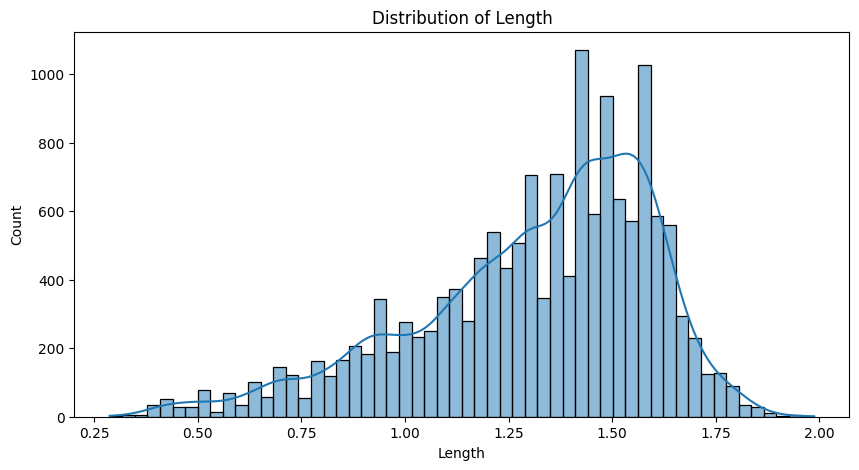

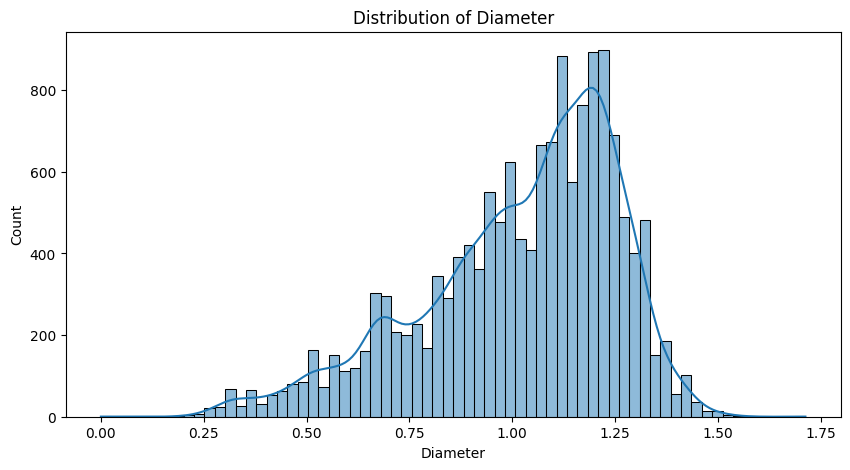

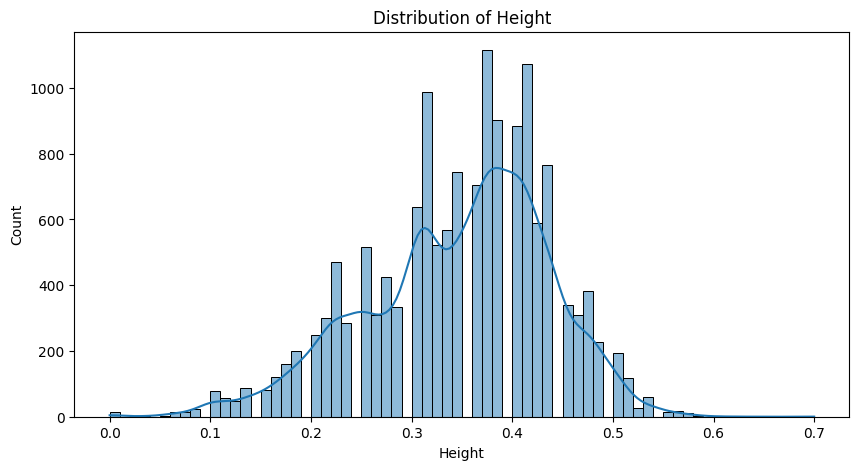

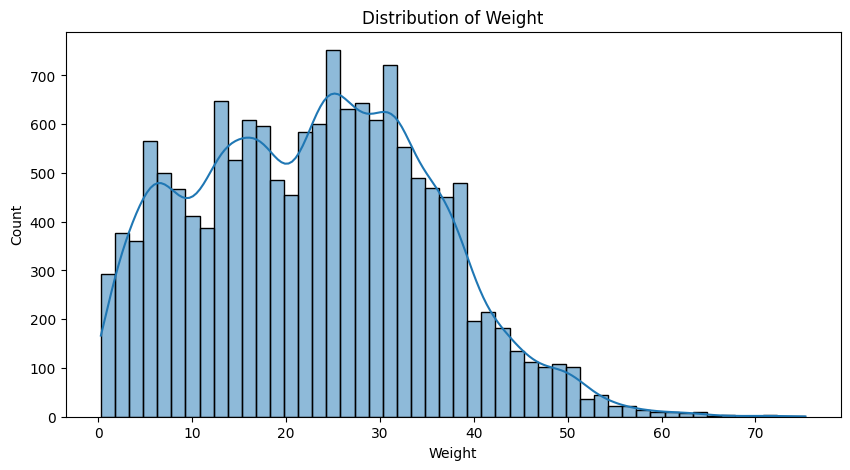

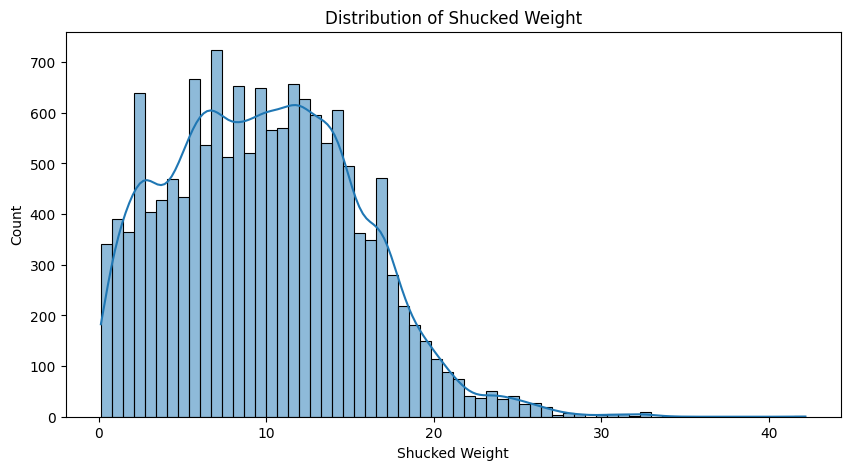

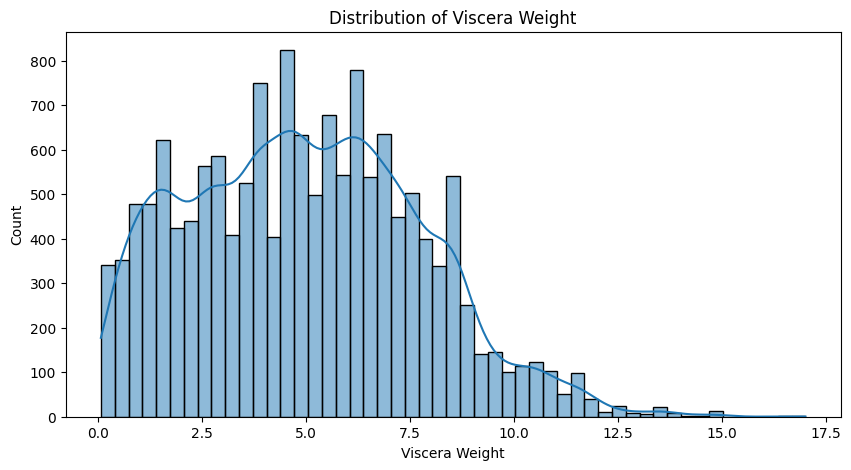

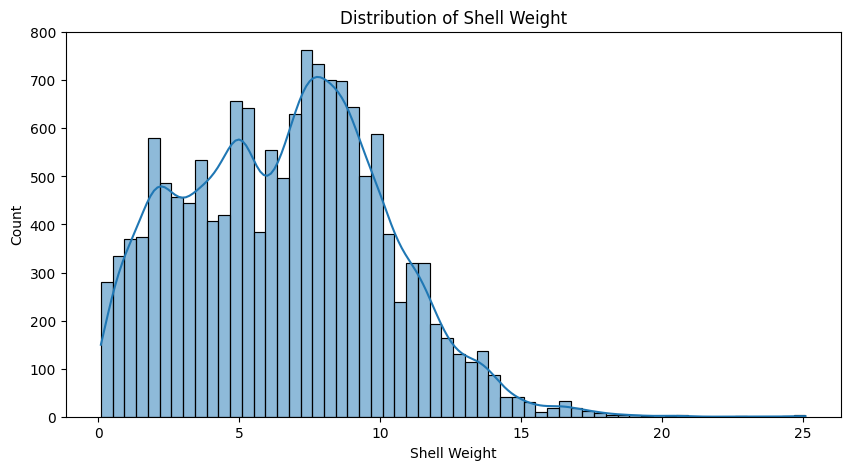

In [5]:
#Distribution of every continous variable
for column in train_data.drop(columns=['Sex_M','Sex_F','Sex_I','Age']).columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(train_data[column], kde=True)  # kde=True adds the density plot
    plt.title(f'Distribution of {column}')
    plt.show()

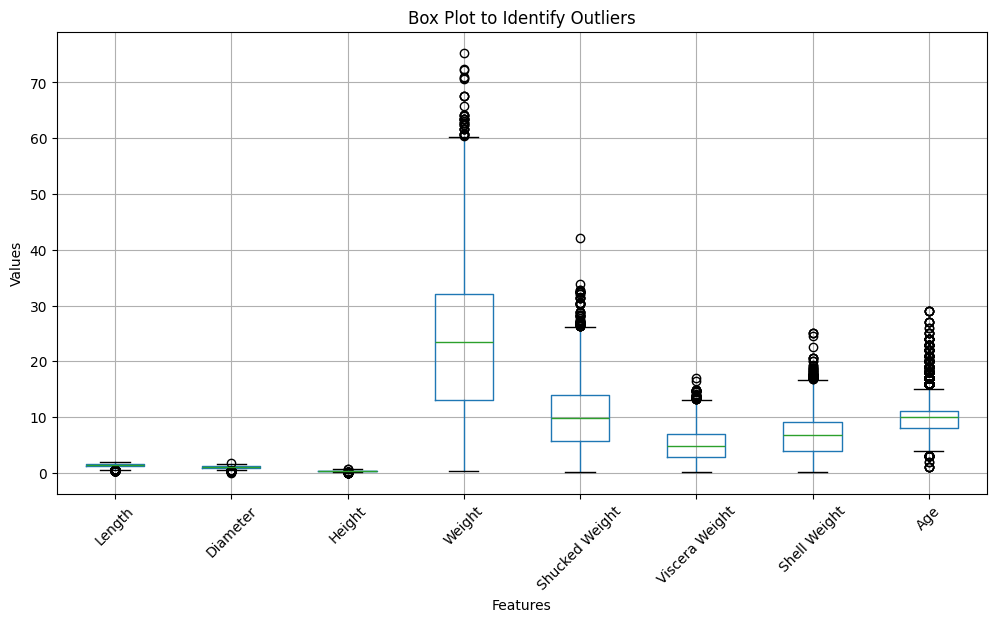

In [6]:
#Box Plots to help identify outliers
numerical_data=train_data.drop(columns=['Sex_M','Sex_F','Sex_I']).columns
plt.figure(figsize=(12, 6))
train_data[numerical_data].boxplot()
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Box Plot to Identify Outliers')
plt.xticks(rotation=45)
plt.show()


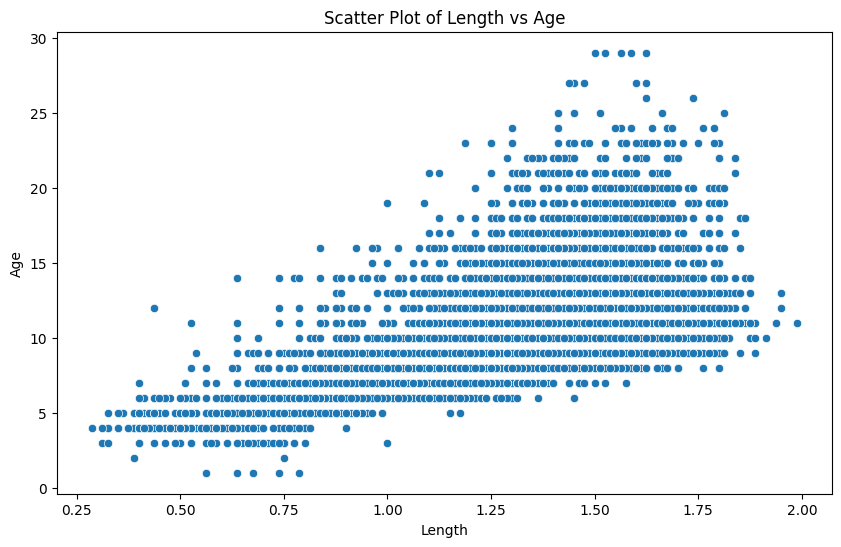

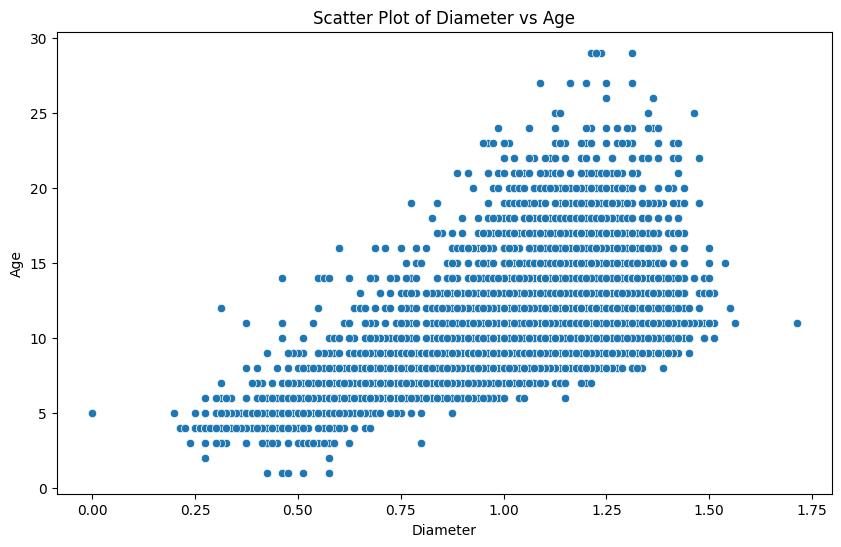

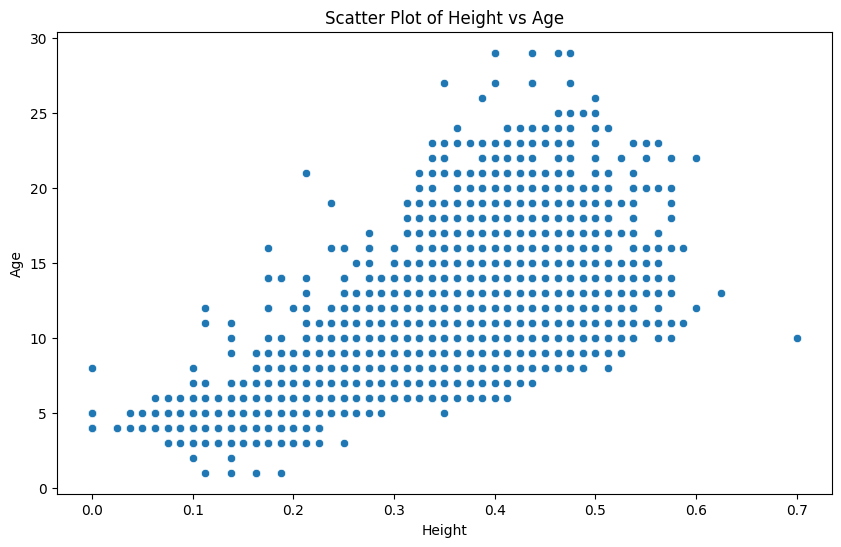

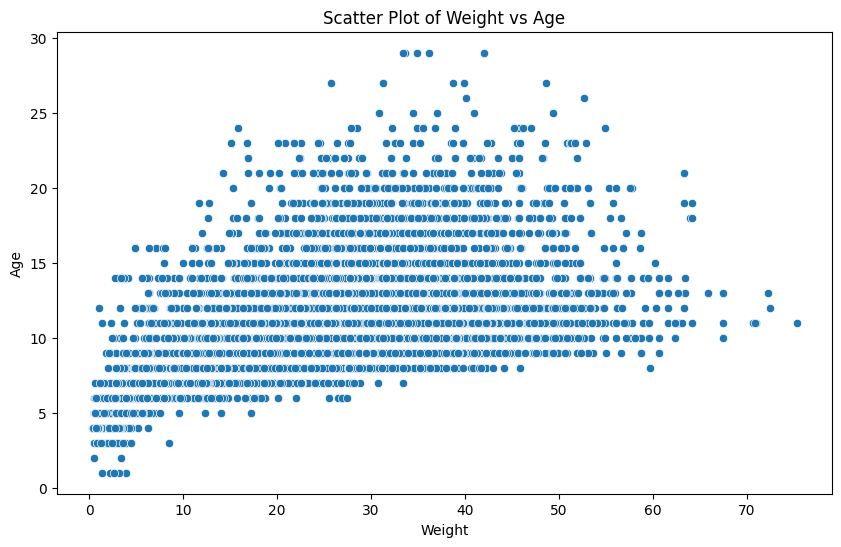

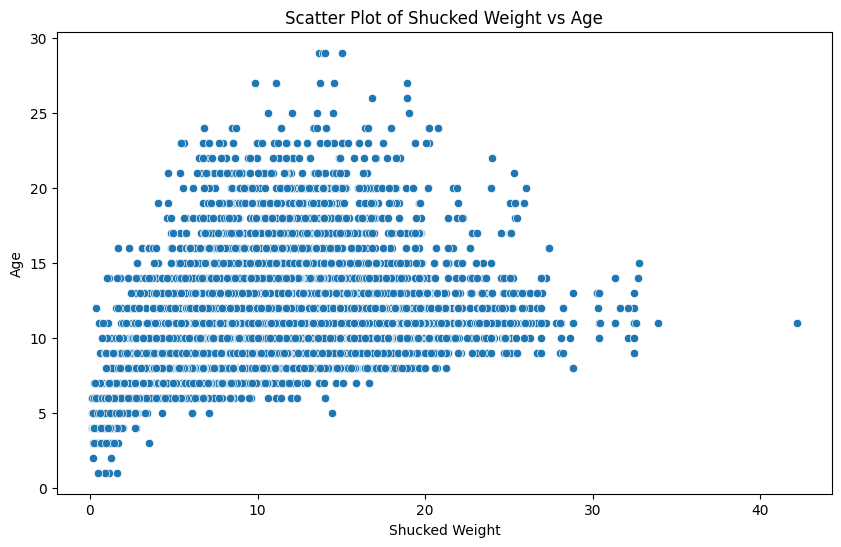

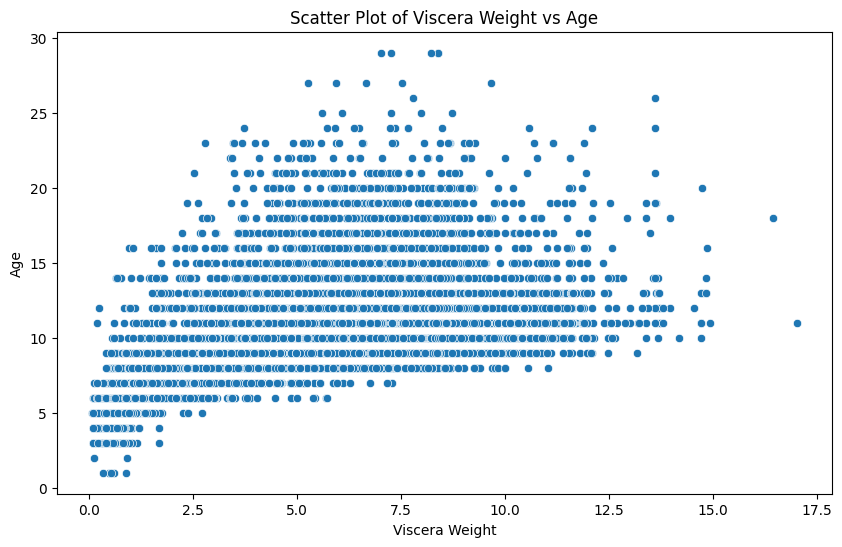

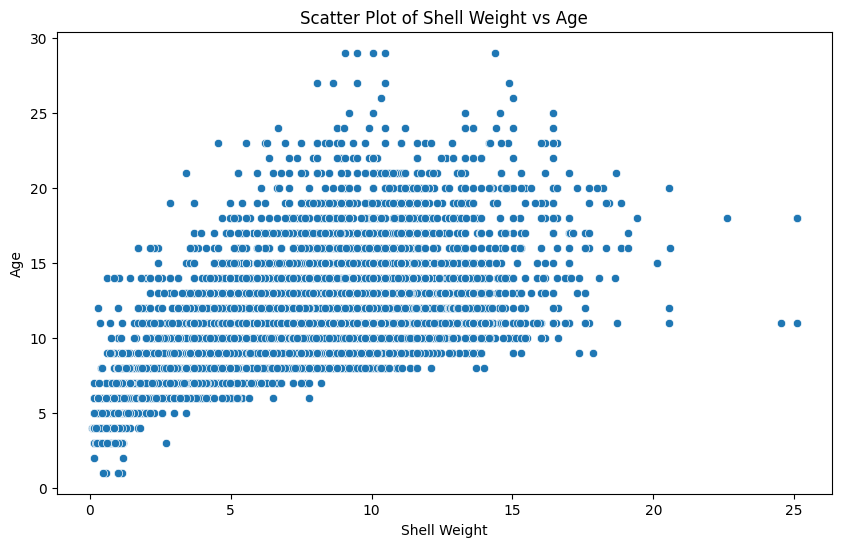

In [7]:
#Scatter plot of each variable(Predictor) against Age(Target)
for column in train_data.drop(columns=['Sex_M','Sex_F','Sex_I','Age']).columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=train_data[column], y=train_data['Age'])
    plt.title(f'Scatter Plot of {column} vs Age')
    plt.xlabel(column)
    plt.ylabel('Age')
    plt.show()

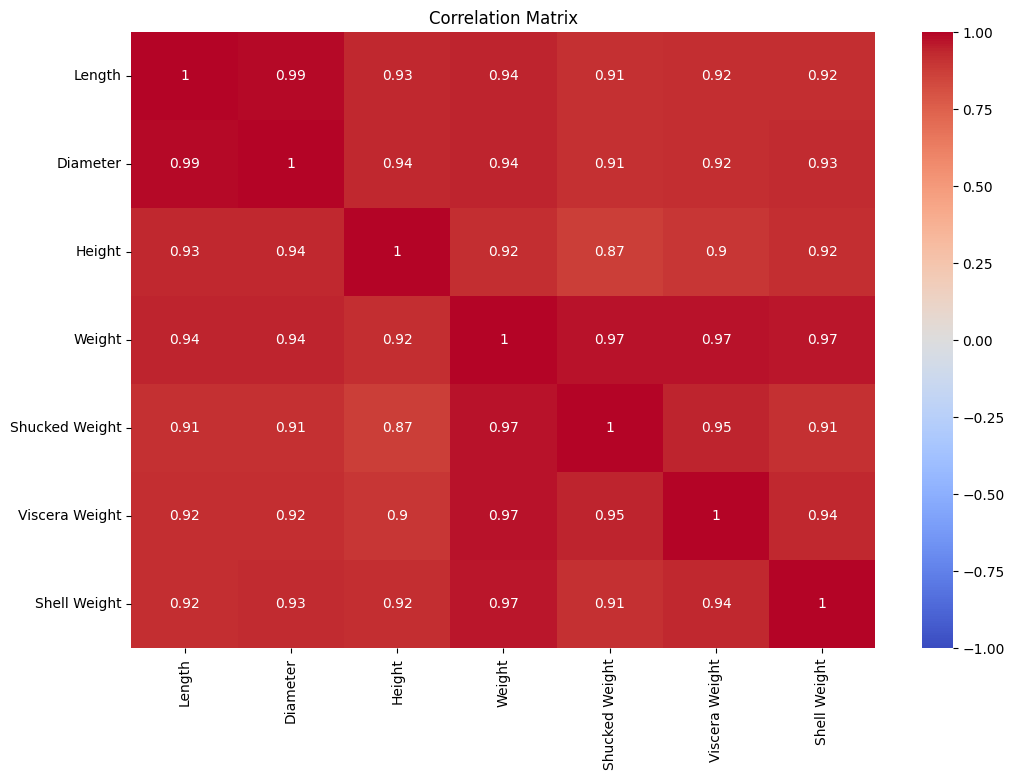

In [8]:
correlation_matrix = train_data.drop(columns=['Sex_M','Sex_F','Sex_I','Age']).corr()

# Displaying the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [9]:
# # Define the features and target variable
X = train_data.drop('Age', axis=1)
y = train_data['Age']

# # Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Standardize the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
test_data=scaler.transform(test_data)


In [11]:
#polynomial regression
poly = PolynomialFeatures(degree=3, include_bias=True)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
test_data_poly = poly.transform(test_data)

In [ ]:
from sklearn.linear_model import HuberRegressor

# Initialize the Huber Regressor
huber = HuberRegressor()

# Fit the model to the polynomial transformed training data
huber.fit(X_train_poly, y_train)

# Predict on the test set
y_test_pred_huber = huber.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_test_pred_huber)
r2 = r2_score(y_test, y_test_pred_huber)
mae = mean_absolute_error(y_test, y_test_pred_huber)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')    

NameError: name 'X_train_poly' is not defined

In [14]:
# ids = list(range(15000, 25000))
# results_df = pd.DataFrame({
#     'id': ids,
#     'prediction': np.round(y_test_pred_huber)
# })
# results_df.to_csv('submission.csv', index=False)